Polynomial Regression on Villa sub-property yields good results

To do --> check Polynomial Regression values on all properties

In [202]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [203]:
df = pd.read_csv('data/clean_data_rmv_some_miss_values_only_villa.csv')

df

,Immoweb ID,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Surface of the plot,Living area,Property type_HOUSE,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
0,9724903,200000.0,4.0,0.0,3.0,0,4,542.0,130.0,1,...,0,0,0,0,0,0,0,0,0.0,1
1,9718593,480000.0,2.0,1.0,3.0,0,4,1346.0,150.0,1,...,0,0,0,0,0,0,0,0,1.0,1
2,9720566,660000.0,4.0,2.0,5.0,0,4,718.0,175.0,1,...,0,0,0,0,0,0,0,0,1.0,1
3,9714659,850000.0,4.0,0.0,4.0,0,4,2868.0,295.0,1,...,0,0,0,0,0,0,0,0,1.0,1
4,9714663,1290000.0,2.0,1.0,5.0,0,4,780.0,307.0,1,...,0,0,0,0,0,0,0,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,9262114,550000.0,2.0,1.0,5.0,0,4,9750.0,350.0,1,...,0,0,0,0,0,0,0,0,1.0,1
2059,9549142,350000.0,6.0,0.0,4.0,0,4,850.0,140.0,1,...,0,0,0,0,0,0,0,0,1.0,0
2060,9626322,2175000.0,6.0,0.0,6.0,0,4,12000.0,650.0,1,...,0,0,0,0,0,0,0,0,0.0,0
2061,9672331,1275000.0,2.0,0.0,5.0,0,4,2368.0,386.0,1,...,0,0,0,0,0,0,0,0,0.0,0


In [204]:
df['property sub-type_VILLA']

0       1
1       1
2       1
3       1
4       1
       ..
2058    1
2059    1
2060    1
2061    1
2062    1
Name: property sub-type_VILLA, Length: 2063, dtype: int64

<AxesSubplot:>

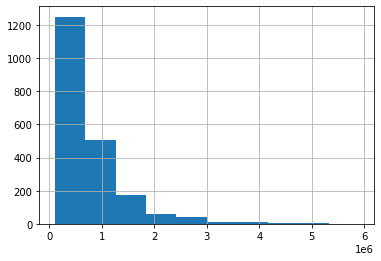

In [205]:
df.Price.hist(bins=10)

In [206]:
#df.drop(df[df['Price'] < 300000].index, inplace = True)
#df.drop(df[df['Price'] > 600000].index, inplace = True)

#df

In [207]:
df = df.drop(columns='Immoweb ID')

df

,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Surface of the plot,Living area,Property type_HOUSE,property sub-type_BUNGALOW,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
0,200000.0,4.0,0.0,3.0,0,4,542.0,130.0,1,0,...,0,0,0,0,0,0,0,0,0.0,1
1,480000.0,2.0,1.0,3.0,0,4,1346.0,150.0,1,0,...,0,0,0,0,0,0,0,0,1.0,1
2,660000.0,4.0,2.0,5.0,0,4,718.0,175.0,1,0,...,0,0,0,0,0,0,0,0,1.0,1
3,850000.0,4.0,0.0,4.0,0,4,2868.0,295.0,1,0,...,0,0,0,0,0,0,0,0,1.0,1
4,1290000.0,2.0,1.0,5.0,0,4,780.0,307.0,1,0,...,0,0,0,0,0,0,0,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,550000.0,2.0,1.0,5.0,0,4,9750.0,350.0,1,0,...,0,0,0,0,0,0,0,0,1.0,1
2059,350000.0,6.0,0.0,4.0,0,4,850.0,140.0,1,0,...,0,0,0,0,0,0,0,0,1.0,0
2060,2175000.0,6.0,0.0,6.0,0,4,12000.0,650.0,1,0,...,0,0,0,0,0,0,0,0,0.0,0
2061,1275000.0,2.0,0.0,5.0,0,4,2368.0,386.0,1,0,...,0,0,0,0,0,0,0,0,0.0,0


In [208]:
df = df.drop(columns='property sub-type_VILLA')

df

,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Surface of the plot,Living area,Property type_HOUSE,property sub-type_BUNGALOW,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
0,200000.0,4.0,0.0,3.0,0,4,542.0,130.0,1,0,...,0,0,0,0,0,0,0,0,0.0,1
1,480000.0,2.0,1.0,3.0,0,4,1346.0,150.0,1,0,...,0,0,0,0,0,0,0,0,1.0,1
2,660000.0,4.0,2.0,5.0,0,4,718.0,175.0,1,0,...,0,0,0,0,0,0,0,0,1.0,1
3,850000.0,4.0,0.0,4.0,0,4,2868.0,295.0,1,0,...,0,0,0,0,0,0,0,0,1.0,1
4,1290000.0,2.0,1.0,5.0,0,4,780.0,307.0,1,0,...,0,0,0,0,0,0,0,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,550000.0,2.0,1.0,5.0,0,4,9750.0,350.0,1,0,...,0,0,0,0,0,0,0,0,1.0,1
2059,350000.0,6.0,0.0,4.0,0,4,850.0,140.0,1,0,...,0,0,0,0,0,0,0,0,1.0,0
2060,2175000.0,6.0,0.0,6.0,0,4,12000.0,650.0,1,0,...,0,0,0,0,0,0,0,0,0.0,0
2061,1275000.0,2.0,0.0,5.0,0,4,2368.0,386.0,1,0,...,0,0,0,0,0,0,0,0,0.0,0


### Find largest correlation variables (attributes) with target (price)

In [214]:
price_corr = df.corr()['Price']

price_corr_10 = price_corr[np.argsort(price_corr, axis=0)[::-1]]

In [215]:
print('Top 10 positive correlation are:')
print(price_corr_10.head(10))
print('.....................................')
print('Top 10 negative correlation are:')
print(price_corr_10.tail(10))


Top 10 positive correlation are:
Price                          1.000000
Living area                    0.663396
Bedrooms                       0.444548
Surface of the plot            0.425808
Post code_7024                      NaN
Post code_7021                -0.015881
property sub-type_FARMHOUSE         NaN
Post code_5380                -0.013724
Post code_1341                      NaN
Post code_2160                -0.009942
Name: Price, dtype: float64
.....................................
Top 10 negative correlation are:
garden_label     -0.071477
garden_label     -0.071477
Post code_7500    0.032366
Post code_7320         NaN
Post code_7330         NaN
Post code_7133   -0.014553
Post code_7160         NaN
Post code_7180   -0.020764
Post code_7331   -0.021995
Post code_7041   -0.013313
Name: Price, dtype: float64


### Scatter Plots

Text(0.5, 1.0, 'Bedrooms vs Price')

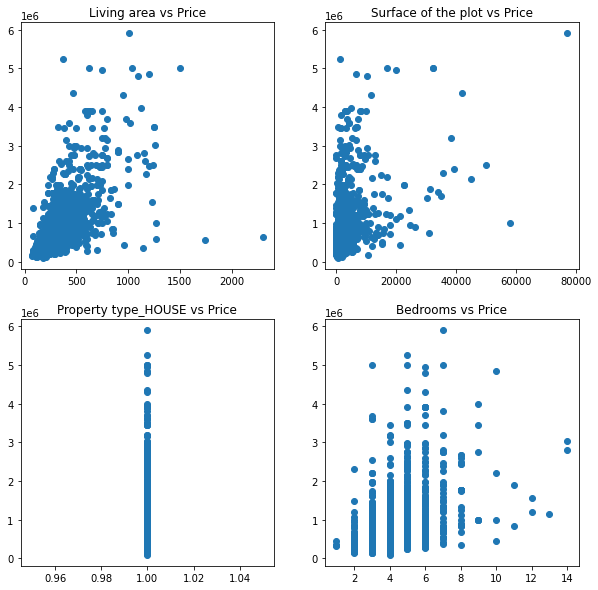

In [209]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].scatter(df['Living area'], df['Price'])
axs[0, 0].set_title('Living area vs Price')
axs[0, 1].scatter(df['Surface of the plot'], df['Price'])
axs[0, 1].set_title('Surface of the plot vs Price')
axs[1, 0].scatter(df['Property type_HOUSE'], df['Price'])
axs[1, 0].set_title('Property type_HOUSE vs Price')
axs[1, 1].scatter(df['Bedrooms'], df['Price'])
axs[1, 1].set_title('Bedrooms vs Price')

### Multiple Linear Regression

#### Multiple Regression with all variables except Post code, Price, Bedrooms, House

In [210]:
X = df.drop(df.filter(regex='Post code').columns, axis=1)
X = X.drop(df.filter(regex='property sub-type').columns, axis=1)
X = X.drop(columns=['Price', 'Bedrooms', 'Property type_HOUSE'])

y = df.Price

X

,Building condition,Kitchen type,Furnished,Number of frontages,Surface of the plot,Living area,City_Aalst,City_Antwerpen,City_Arlon,City_Arrondissement Brussel-Hoofdstad,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
0,4.0,0.0,0,4,542.0,130.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1
1,2.0,1.0,0,4,1346.0,150.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
2,4.0,2.0,0,4,718.0,175.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
3,4.0,0.0,0,4,2868.0,295.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
4,2.0,1.0,0,4,780.0,307.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,2.0,1.0,0,4,9750.0,350.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,1
2059,6.0,0.0,0,4,850.0,140.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0
2060,6.0,0.0,0,4,12000.0,650.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.0,0
2061,2.0,0.0,0,4,2368.0,386.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.0,0


In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1547, 51)
(516, 51)
(1547,)
(516,)


In [212]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

regressor.score(X_train, y_train)

0.674565097883048

In [213]:
regressor.score(X_test, y_test)

0.5498032924907412

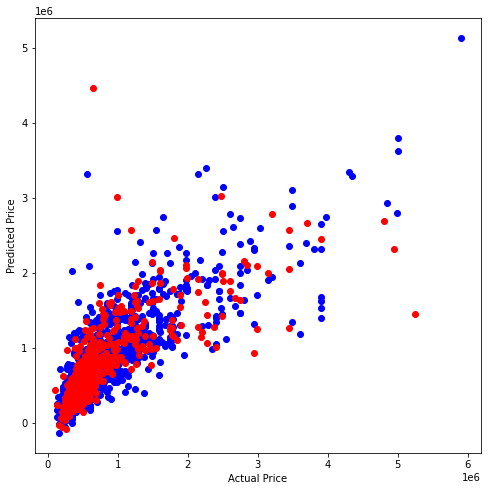

In [194]:
plt.figure(figsize=(8,8))
plt.scatter(y_train, regressor.predict(X_train), c='blue')
plt.scatter(y_test, regressor.predict(X_test), c='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

### Polynomial Regression with degree 2

In [195]:
degree = 2

In [196]:
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [197]:
polyreg.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [198]:
polyreg.predict(X_test)

array([  523641.84732156,   495692.15701123,  1047917.86573926,
         533673.94098888,   571630.35086884,  1333641.43962849,
         366391.7857369 ,  1245939.50354085,  1853672.0648413 ,
         846469.3511991 ,   595542.74024284,  1368579.36018491,
        1059094.60486539,  -110132.39146561,  1562790.34987495,
        1574431.60169571,  1257116.27868892,   917796.32515044,
         380253.11333802,   659393.91838392,  1453746.14055259,
        3689561.23539811,   298127.52873842,   318575.73164336,
         908258.83056129,   241226.22600063,  1155960.49596205,
         333240.37691111,   881426.11562326,   495387.56821539,
         598191.54722467,  1125508.38190184,  1054969.03291373,
        1118698.84717848,   720158.89087222,   486775.25112721,
         625333.21982149,   690258.92119483,  1240150.10529768,
         486373.78094386,   614699.79066302,  1710324.01521186,
        1237778.80650078,   319623.04386571,   866309.63671695,
        1978274.11621772,   492989.59363

In [199]:
polyreg.score(X_train, y_train)

0.8054471321516148

In [200]:
polyreg.score(X_test, y_test)

0.4984032420363852

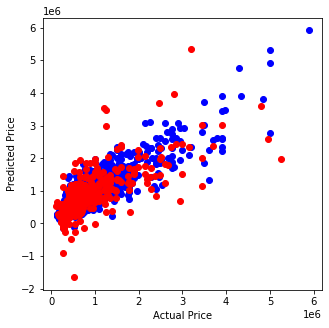

In [201]:
plt.figure(figsize=(5,5))
plt.scatter(y_train, polyreg.predict(X_train), c='blue')
plt.scatter(y_test, polyreg.predict(X_test), c='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

### Polynomial Regression with degree 3

In [186]:
degree = 3

In [187]:
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

In [188]:
polyreg.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [189]:
polyreg.predict(X_test)

array([ 2.28595293e+06,  1.24696685e+06,  5.77474510e+05,  6.68491575e+05,
        5.48017037e+05,  6.59710778e+05,  2.76489351e+05,  1.39647648e+06,
        2.57155312e+06,  8.84245613e+05,  4.21725104e+05,  1.58602892e+06,
        1.81300283e+07,  4.07537889e+06,  1.52673336e+06,  1.39490471e+06,
        1.96296302e+06, -9.27971188e+04,  3.56171820e+05,  9.67831396e+05,
       -7.88465382e+05,  3.98179580e+06,  3.31306634e+05,  1.21687184e+05,
        6.40821926e+05,  3.01137273e+05,  1.08551931e+06,  3.33927391e+05,
        1.03215308e+06, -2.01882664e+06, -7.10794529e+05,  1.01325633e+06,
        1.06930180e+06,  6.93230966e+05,  2.57642870e+05,  1.54844341e+06,
        5.60102170e+05, -2.30750092e+04,  1.08697280e+06,  1.13949201e+06,
        8.54039766e+05,  2.75634594e+06,  1.57121516e+06,  3.52230486e+05,
        7.88485782e+05,  1.82946339e+06, -1.05298599e+05,  2.88977743e+06,
        2.08767443e+05,  4.46411067e+05,  8.71966026e+05,  1.51719468e+06,
        5.78976401e+05,  

In [190]:
polyreg.score(X_train, y_train)

0.9418963936270391

In [191]:
polyreg.score(X_test, y_test)

-209.96709387845172

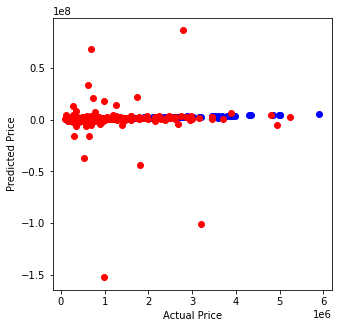

In [193]:
plt.figure(figsize=(5,5))
plt.scatter(y_train, polyreg.predict(X_train), c='blue')
plt.scatter(y_test, polyreg.predict(X_test), c='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

## Rough Work

In [5]:
df.corr()

,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Surface of the plot,Living area,Property type_APARTMENT,Property type_HOUSE,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
Price,1.000000,0.130690,0.111556,0.467959,0.096996,0.205299,0.316309,0.618560,-0.262206,0.262206,...,-0.005674,-0.032458,0.011367,-0.009736,-0.034731,-0.020182,-0.013232,-0.024174,0.069027,0.050560
Building condition,0.130690,1.000000,0.344457,-0.051515,0.075634,0.013596,-0.048551,-0.025301,0.115501,-0.115501,...,-0.001404,-0.025949,0.013995,0.001394,0.000015,0.009486,-0.033016,0.011299,0.140012,0.007205
Kitchen type,0.111556,0.344457,1.000000,-0.010195,-0.041920,0.072035,-0.031488,-0.008117,0.074490,-0.074490,...,-0.031867,-0.015202,0.005253,-0.010689,-0.036858,-0.009379,-0.020221,-0.012482,0.199905,0.053229
Bedrooms,0.467959,-0.051515,-0.010195,1.000000,0.028285,0.289224,0.264714,0.666191,-0.553852,0.553852,...,0.008652,-0.020859,0.053618,-0.012467,0.065613,-0.062158,0.033091,0.017130,-0.031192,0.138672
Furnished,0.096996,0.075634,-0.041920,0.028285,1.000000,-0.024672,0.031022,0.038466,-0.013293,0.013293,...,-0.016908,0.004601,0.012099,-0.011034,0.022597,0.036631,-0.018346,-0.017415,0.059758,-0.111575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City_Veurne,-0.020182,0.009486,-0.009379,-0.062158,0.036631,-0.052755,-0.018123,-0.063094,0.064499,-0.064499,...,-0.009067,-0.013406,-0.012009,-0.021396,-0.016912,1.000000,-0.004405,-0.009446,0.003760,-0.015467
City_Virton,-0.013232,-0.033016,-0.020221,0.033091,-0.018346,0.003738,-0.001050,0.040745,-0.037576,0.037576,...,-0.003217,-0.004757,-0.004261,-0.007592,-0.006001,-0.004405,1.000000,-0.003352,-0.034974,0.024480
City_Waremme,-0.024174,0.011299,-0.012482,0.017130,-0.017415,0.068897,0.013103,0.008346,-0.035473,0.035473,...,-0.006898,-0.010199,-0.009136,-0.016278,-0.012867,-0.009446,-0.003352,1.000000,0.007510,0.035405
Terrace_Combined,0.069027,0.140012,0.199905,-0.031192,0.059758,0.068834,-0.046660,-0.042979,0.114103,-0.114103,...,-0.032662,-0.007691,0.017173,0.002302,-0.005043,0.003760,-0.034974,0.007510,1.000000,0.026135


In [186]:
df.columns.to_list()

['Price',
 'Building condition',
 'Kitchen type',
 'Bedrooms',
 'Furnished',
 'Number of frontages',
 'Surface of the plot',
 'Living area',
 'Property type_HOUSE',
 'property sub-type_BUNGALOW',
 'property sub-type_CASTLE',
 'property sub-type_CHALET',
 'property sub-type_COUNTRY_COTTAGE',
 'property sub-type_DUPLEX',
 'property sub-type_EXCEPTIONAL_PROPERTY',
 'property sub-type_FARMHOUSE',
 'property sub-type_FLAT_STUDIO',
 'property sub-type_GROUND_FLOOR',
 'property sub-type_KOT',
 'property sub-type_LOFT',
 'property sub-type_MANOR_HOUSE',
 'property sub-type_MANSION',
 'property sub-type_MIXED_USE_BUILDING',
 'property sub-type_PENTHOUSE',
 'property sub-type_SERVICE_FLAT',
 'property sub-type_TOWN_HOUSE',
 'property sub-type_TRIPLEX',
 'property sub-type_VILLA',
 'Post code_1000',
 'Post code_1020',
 'Post code_1030',
 'Post code_1040',
 'Post code_1050',
 'Post code_1060',
 'Post code_1070',
 'Post code_1080',
 'Post code_1081',
 'Post code_1082',
 'Post code_1083',
 'Post cod

#### Multiple Regression with all variables except Post code

In [70]:
#X = df.drop(df.columns[df.columns.str.contains('Post code')], axis=1, inplace=True)
X = df.loc[:, ~df.columns.str.startswith('Post code_')]
#X = df.drop(df.filter(regex='City').columns, axis=1)
X = X.drop(columns=['Price', 'Bedrooms'])
y = df.Price

X

,Building condition,Kitchen type,Furnished,Number of frontages,Surface of the plot,Living area,Property type_APARTMENT,Property type_HOUSE,property sub-type_BUNGALOW,property sub-type_CASTLE,...,City_Tielt,City_Tongeren,City_Tournai,City_Turnhout,City_Verviers,City_Veurne,City_Virton,City_Waremme,Terrace_Combined,garden_label
0,4.0,1.0,1,2.0,0.0,63.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0
1,4.0,1.0,1,2.0,0.0,42.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0
2,4.0,1.0,1,2.0,0.0,42.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0
3,4.0,1.0,1,2.0,0.0,150.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0
4,4.0,2.0,0,3.0,0.0,120.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8965,6.0,1.0,0,4.0,0.0,63.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0
8966,6.0,0.0,1,2.0,0.0,55.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0
8967,6.0,0.0,0,2.0,0.0,65.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0
8968,2.0,0.0,1,2.0,0.0,52.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6727, 72)
(2243, 72)
(6727,)
(2243,)


In [90]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

regressor.score(X_train, y_train)

0.5547665087585342

In [91]:
regressor.score(X_test, y_test)

0.5238204296364566

#### Multiple Linear Regression with highest influential variables

In [139]:
x_1 = df['Living area'].to_numpy()
x_2 = df['Surface of the plot'].to_numpy()
#x_3 = df['Bedrooms'].to_numpy()
#x_4 = df['Property type_HOUSE'].to_numpy()

#x_5 = df['Property type_APARTMENT'].to_numpy()
#x_6 = df['property sub-type_FLAT_STUDIO'].to_numpy()
#x_7 = df['property sub-type_GROUND_FLOOR'].to_numpy()
y = df.Price.to_numpy()

#X = x_1
#X = np.column_stack((x_1, x_2, x_3, x_4, x_5, x_6, x_7))
#X = np.column_stack((x_1, x_2, x_4, x_5, x_6, x_7))
X = np.column_stack((x_1, x_2))

print(X.shape)
print(y.shape)

(8970, 2)
(8970,)


In [22]:
#plt.scatter(X, y)
#plt.show()

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6727, 2)
(2243, 2)
(6727,)
(2243,)


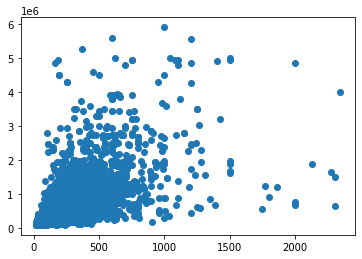

In [19]:
plt.figure()
plt.scatter(X_train, y_train)

In [141]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

regressor.score(X_train, y_train)

0.3854771789445295

In [142]:
regressor.score(X_test, y_test)

0.42426909820179604

### Create a class/function to do backward selection

https://www.youtube.com/watch?v=Nv6e9S8fwzA

https://towardsdatascience.com/multiple-linear-regression-8cf3bee21d8b

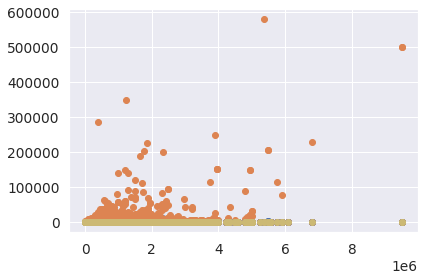

In [34]:
for i in df_key.columns:
    if i == 'Price':
        continue
    plt.scatter(df_key.Price, df_key[i])

plt.tight_layout()
plt.show()

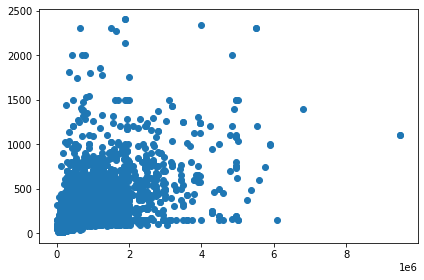

In [43]:
plt.scatter(df.Price, df['Living area'])

plt.tight_layout()
plt.show()

In [ ]:
x_1 = 

In [26]:
X = df_key.drop(columns=['Price']).to_numpy().reshape(-1,1)
y = df_key.Price.to_numpy()

In [21]:
X

,Living area,Surface of the plot,Bedrooms,Property type_HOUSE,property sub-type_CASTLE,property sub-type_VILLA,Number of frontages,property sub-type_EXCEPTIONAL_PROPERTY,Post code_8300
0,63.0,0.0,1,0,0,0,3,0,0
1,42.0,0.0,1,0,0,0,2,0,0
2,42.0,0.0,1,0,0,0,2,0,0
3,150.0,0.0,3,0,0,0,2,0,0
4,120.0,0.0,2,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...
12206,95.0,0.0,1,0,0,0,3,0,0
12207,95.0,0.0,1,0,0,0,3,0,0
12208,95.0,0.0,2,0,0,0,3,0,0
12209,1500.0,0.0,30,0,0,0,3,0,0


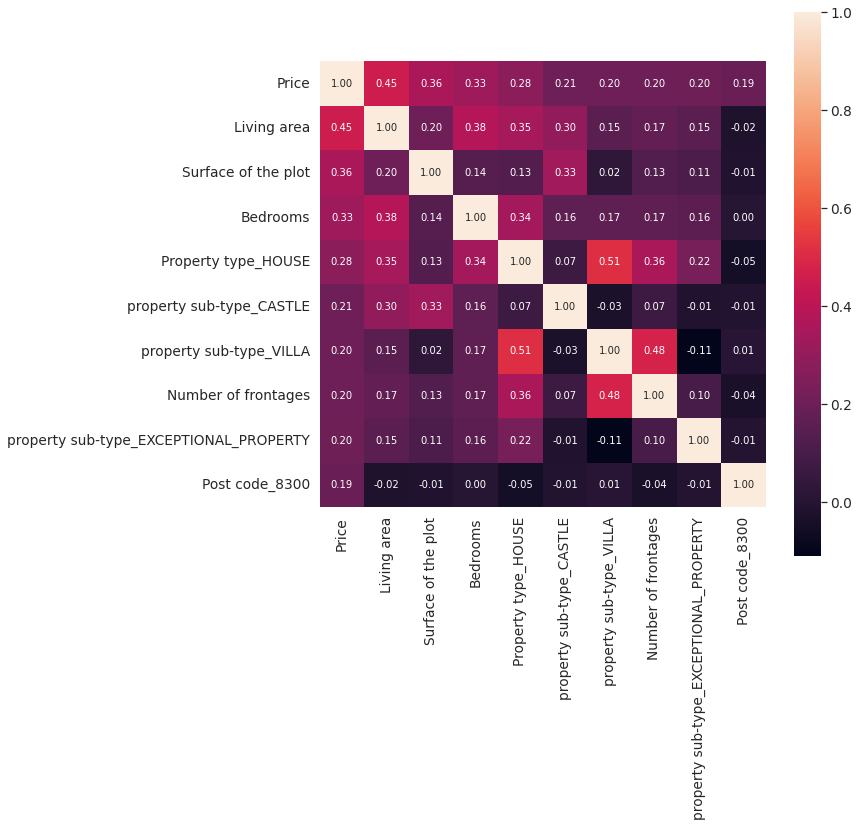

In [10]:
k = 10
corrmat = df.corr()
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(df[cols].values.T)

fig, ax = plt.subplots(figsize=(10,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, ax=ax)
plt.show()

## To be removed

####  Create a smaller dataframe with most influential variables and target

In [29]:
df_key = df[['Price', 'Living area', 'Surface of the plot', 'Bedrooms', 'Property type_HOUSE', 
             'property sub-type_CASTLE', 'property sub-type_VILLA', 'Number of frontages', 
             'property sub-type_EXCEPTIONAL_PROPERTY', 'Post code_8300']]

df_key

,Price,Living area,Surface of the plot,Bedrooms,Property type_HOUSE,property sub-type_CASTLE,property sub-type_VILLA,Number of frontages,property sub-type_EXCEPTIONAL_PROPERTY,Post code_8300
0,179000.0,63.0,0.0,1,0,0,0,3,0,0
1,255000.0,42.0,0.0,1,0,0,0,2,0,0
2,255000.0,42.0,0.0,1,0,0,0,2,0,0
3,620000.0,150.0,0.0,3,0,0,0,2,0,0
4,379000.0,120.0,0.0,2,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...
12206,132000.0,95.0,0.0,1,0,0,0,3,0,0
12207,177000.0,95.0,0.0,1,0,0,0,3,0,0
12208,190000.0,95.0,0.0,2,0,0,0,3,0,0
12209,1350000.0,1500.0,0.0,30,0,0,0,3,0,0


In [49]:
df_key['Living area'].corr(df_key['Price'])

0.4512357721484928